In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam_notSpam.csv')

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(14619, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   14619 non-null  object
 1   text    14618 non-null  object
dtypes: object(2)
memory usage: 228.6+ KB


In [6]:
df[df['text'].isna()]

,label,text
12991,spam,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(14618, 2)

In [9]:
df.duplicated().sum()

0

In [10]:
df[(df['text'].str.strip() == '')]

,label,text
12859,spam,


In [11]:
df[(df['label'].str.strip() == '')]

,label,text


In [12]:
df = df[~(df['text'].str.strip() == '')]

In [13]:
df.shape

(14617, 2)

In [14]:
df['text']=df['text'].str.lower()

In [15]:
df

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
14614,ham,problems started when i booked the intercontin...
14615,ham,the amalfi hotel has a beautiful website and i...
14616,ham,the intercontinental chicago magnificent mile ...
14617,ham,"the palmer house hilton, while it looks good i..."


In [16]:
df[df['text'].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,label,text
4269,ham,"cha quiteamuzing thatscool babe,probpop in & ..."
5694,spam,subject: ? ? ? ? ? ? ? ? erp !\r\n? ????? ? ? ...
10150,ham,date wed number aug number number number numb...
10151,ham,martin a posted tassos papadopoulos the greek ...
10152,ham,man threatens explosion in moscow thursday aug...
...,...,...
13578,spam,we enjoyed our stay at the swissotel in downt...
13597,spam,the hard rock hotel chicago is great alternat...
13695,spam,if you are traveling anywhere near lake michi...
13747,spam,we just returned from a relaxing stay at the ...


In [17]:
df['text']=df['text'].str.strip()

In [18]:
df[df['text'].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,label,text


In [19]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [20]:
email_contains_url=df[df['text'].str.contains(url_pattern,regex=True)]

In [21]:
email_contains_url

,label,text
15,spam,"xxxmobilemovieclub: to use your credit, click ..."
301,spam,sms. ac blind date 4u!: rodds1 is 21/m from ab...
509,spam,your credits have been topped up for http://ww...
624,spam,"dear voucher holder, 2 claim this weeks offer,..."
812,spam,"dear voucher holder, to claim this weeks offer..."
859,spam,reminder: you have not downloaded the content ...
1077,spam,message important information for o2 user. tod...
1362,spam,"urgent, important information for o2 user. tod..."
2897,spam,you are now unsubscribed all services. get ton...
3001,spam,"dear voucher holder, to claim this weeks offer..."


In [22]:
email_contains_url.shape

(20, 2)

In [23]:
email_with_newline=df[df['text'].str.contains('\n')]

In [24]:
email_with_newline

,label,text
4727,ham,"keep ur problems in ur heart, b'coz nobody wil..."
5157,ham,subject: enron methanol ; meter # : 988291\r\n...
5158,ham,"subject: hpl nom for january 9 , 2001\r\n( see..."
5159,ham,"subject: neon retreat\r\nho ho ho , we ' re ar..."
5160,spam,"subject: photoshop , windows , office . cheap ..."
...,...,...
10145,ham,"subject: fw : crosstex energy , driscoll ranch..."
10146,ham,subject: put the 10 on the ft\r\nthe transport...
10147,ham,subject: 3 / 4 / 2000 and following noms\r\nhp...
10148,ham,subject: industrial worksheets for august 2000...


In [25]:
df['text']=df['text'].str.replace('\n',' ',regex=True)

In [26]:
df[df['text'].str.contains('\n')]

,label,text


# EDA with text preprocessing

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='label', ylabel='count'>

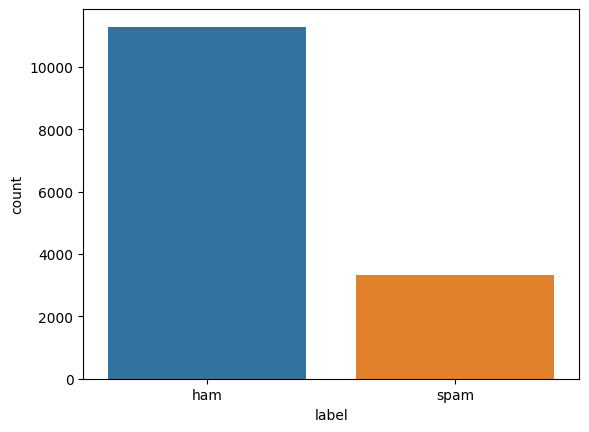

In [28]:
sns.countplot(data=df,x='label')

In [29]:
df['label'].value_counts(normalize=True).mul(100).round(2)

label
ham     77.23
spam    22.77
Name: proportion, dtype: float64

In [30]:
df['word_count']=df['text'].apply(lambda x:len(x.split()))

In [31]:
df.sample(5)

,label,text,word_count
5714,ham,subject: conoco supply cuts on oasis 5 / 21 - ...,103
1906,ham,no i'm in the same boat. still here at my moms...,19
9563,ham,subject: per nelson ferries ( dealmaker ) : we...,49
12569,ham,smith graham computing technician wrote url th...,39
10339,ham,m mike masnick mike techdirt com writes m in w...,772


In [32]:
df['word_count'].describe()

count    14617.000000
mean       148.180612
std        339.398245
min          1.000000
25%         17.000000
50%         61.000000
75%        167.000000
max      13303.000000
Name: word_count, dtype: float64

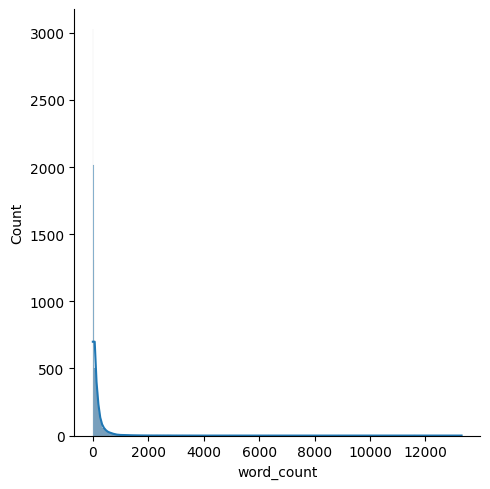

In [33]:
sns.displot(df['word_count'],kde=True)

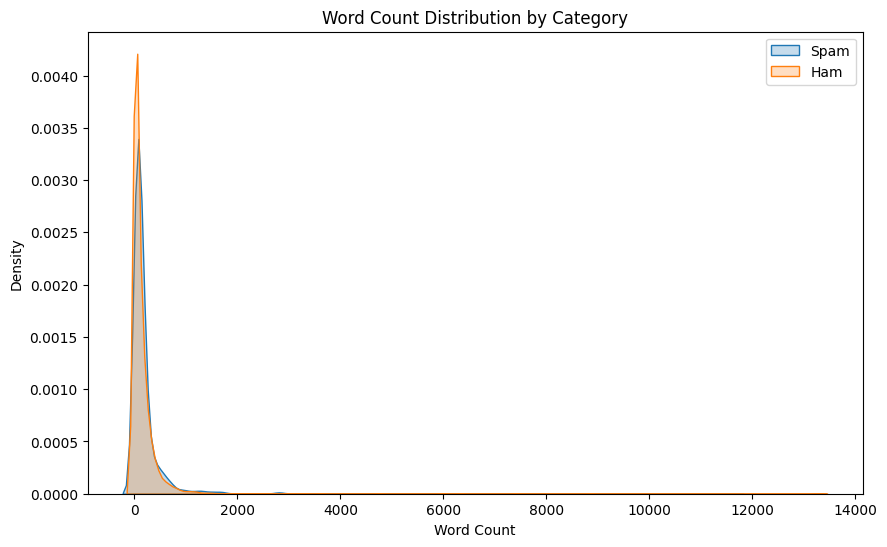

In [34]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['label'] == "spam"]['word_count'], label='Spam', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['label'] == "ham"]['word_count'], label='Ham', fill=True)



# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: >

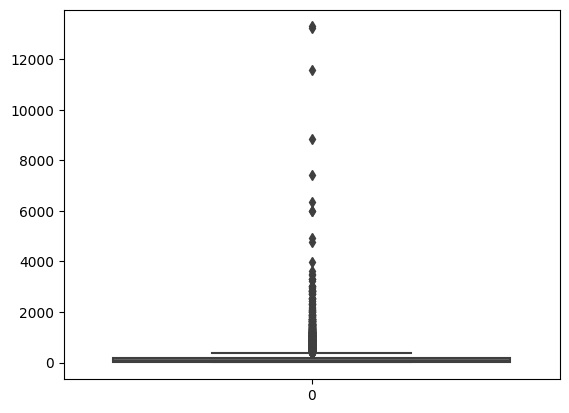

In [35]:
sns.boxplot(df['word_count'])

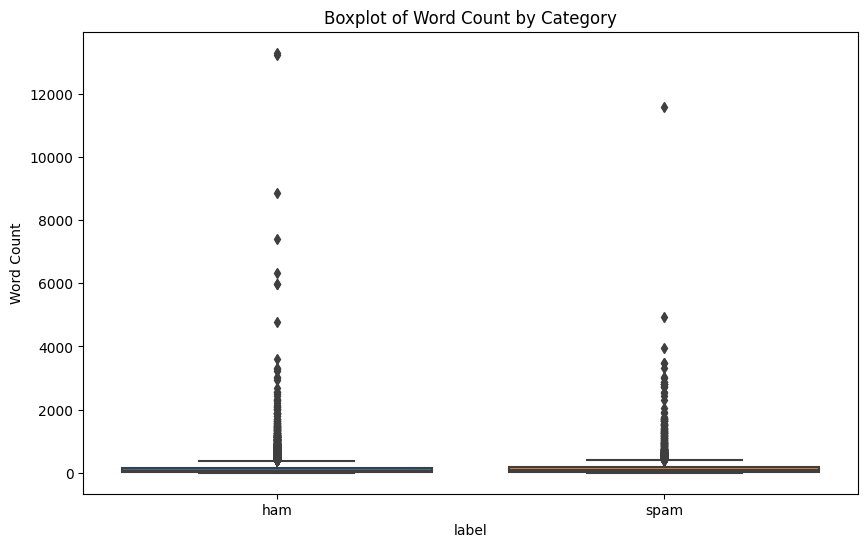

In [36]:
# Create a boxplot for the 'wordcount' column categorized by 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('label')
plt.ylabel('Word Count')
plt.show()

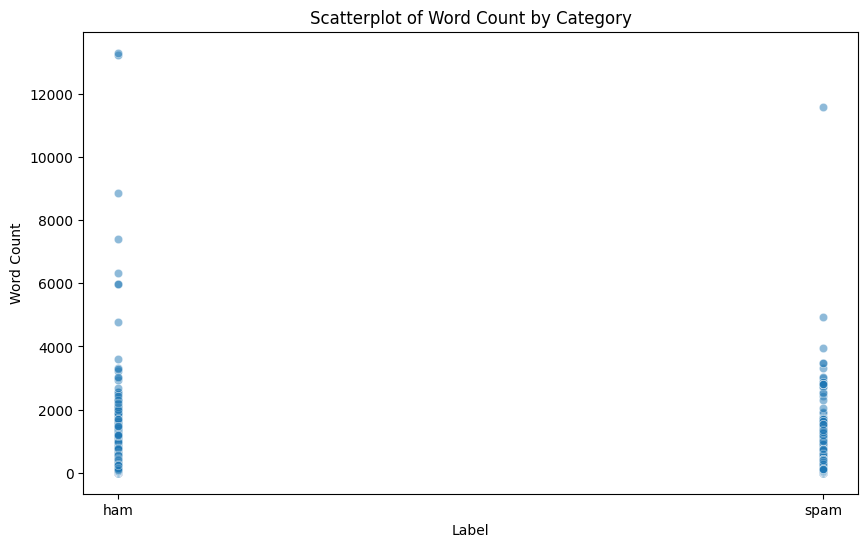

In [37]:
# Create a scatterplot between 'label' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='label', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='label', ylabel='word_count'>

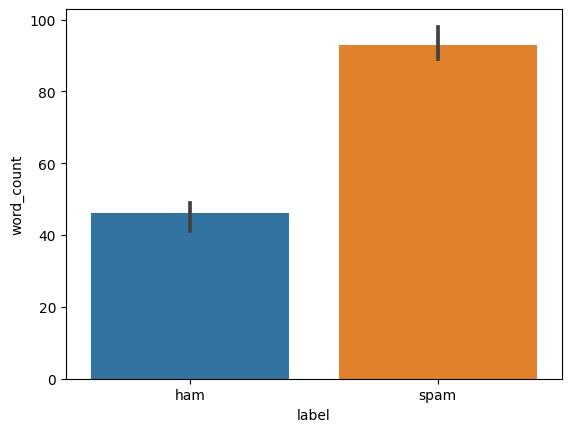

In [38]:
# median word counts among label

sns.barplot(df,x='label',y='word_count',estimator='median')

# EDA with text preprocessing

In [39]:
!pip install nltk

In [40]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [42]:
df.sample(10)

,label,text,word_count,num_stop_words
8157,ham,subject: meter 986315\r for dec . and jan . pr...,42,15
3267,ham,my phone,2,1
12184,ham,url url date not supplied using one species to...,23,6
13239,spam,stayed here for 4 nights in apri. from check i...,64,30
9598,spam,"subject: fw : dripping wmeon plcs\r hello , he...",28,5
11625,ham,on sun number sep number the voices made marc ...,141,49
6511,ham,subject: fw : 2 nd rev / hpl nom . eff . march...,293,43
2042,ham,"sorry im getting up now, feel really bad- tota...",14,3
10560,ham,congrats in the end if they didn t have max th...,612,258
781,spam,last chance! claim ur £150 worth of discount v...,26,3


In [43]:
df['num_stop_words'].describe()

count    14617.000000
mean        47.031197
std        124.973790
min          0.000000
25%          5.000000
50%         16.000000
75%         56.000000
max       5667.000000
Name: num_stop_words, dtype: float64

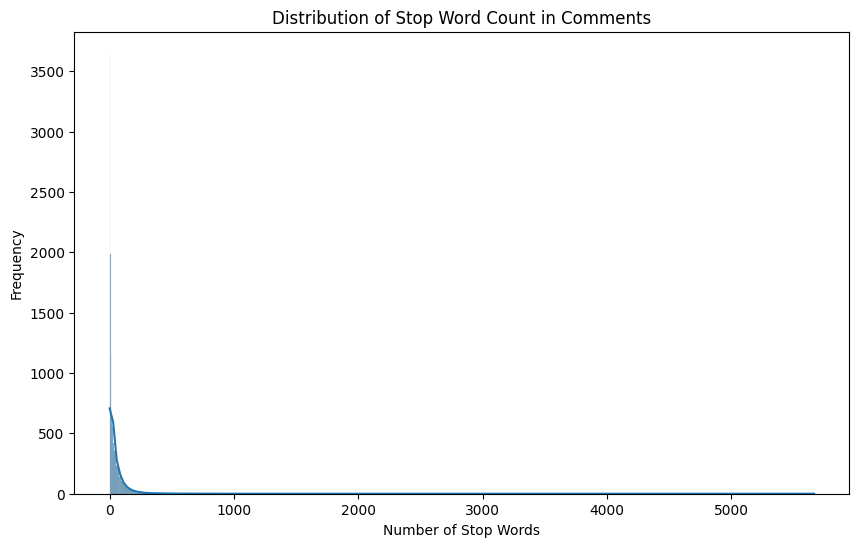

In [44]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

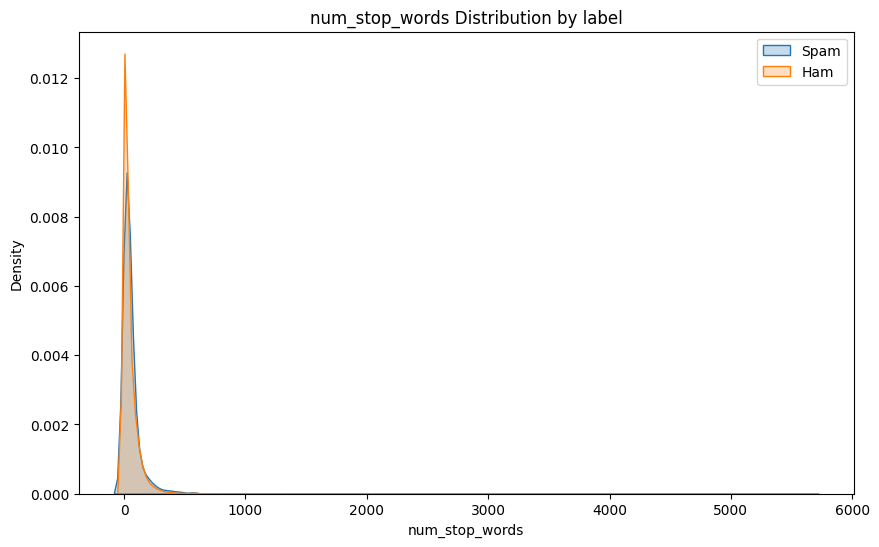

In [45]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['label'] == "spam"]['num_stop_words'], label='Spam', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['label'] == "ham"]['num_stop_words'], label='Ham', fill=True)



# Add title and labels
plt.title('num_stop_words Distribution by label')
plt.xlabel('num_stop_words')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='label', ylabel='num_stop_words'>

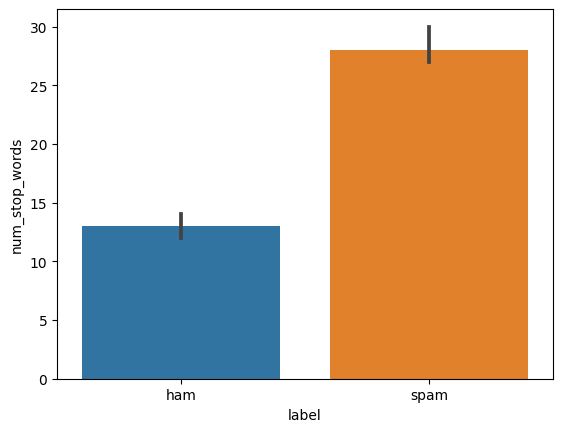

In [46]:
# median word counts among emails

sns.barplot(df,x='label',y='num_stop_words',estimator='median')

In [47]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


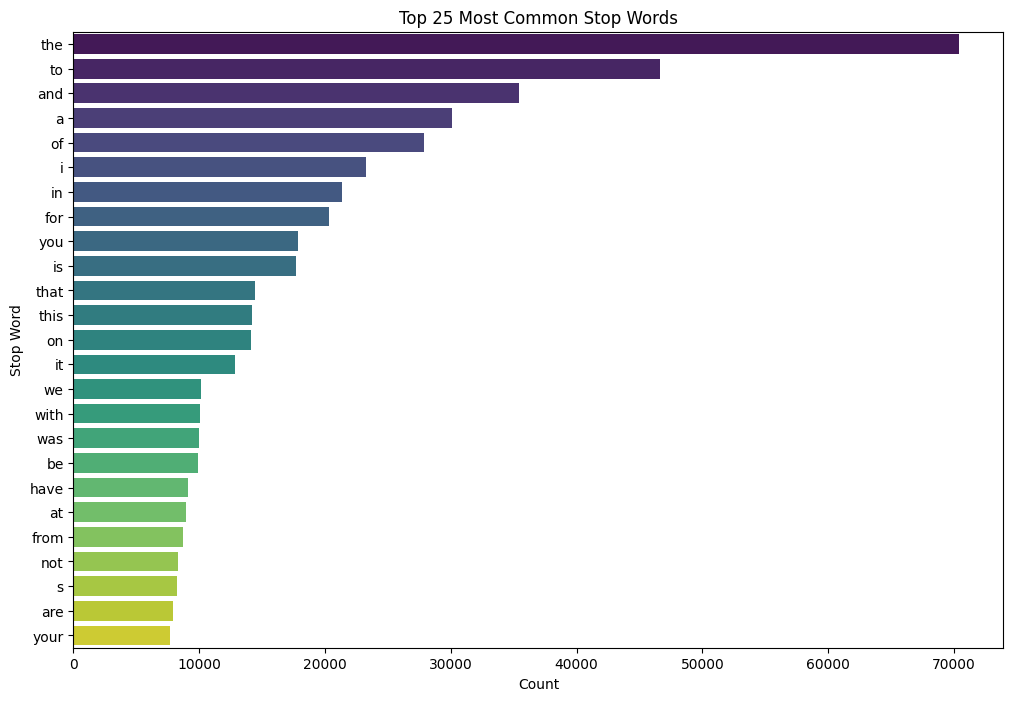

In [48]:
# Create a frequency distribution of stop words in the 'text' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['text'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [49]:
df

,label,text,word_count,num_stop_words
0,ham,"go until jurong point, crazy.. available only ...",20,4
1,ham,ok lar... joking wif u oni...,6,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,5
3,ham,u dun say so early hor... u c already then say...,11,2
4,ham,"nah i don't think he goes to usf, he lives aro...",13,6
...,...,...,...,...
14614,ham,problems started when i booked the intercontin...,131,59
14615,ham,the amalfi hotel has a beautiful website and i...,121,62
14616,ham,the intercontinental chicago magnificent mile ...,141,72
14617,ham,"the palmer house hilton, while it looks good i...",86,47


In [50]:
df['num_chars']=df['text'].apply(len)

In [51]:
df.head()

,label,text,word_count,num_stop_words,num_chars
0,ham,"go until jurong point, crazy.. available only ...",20,4,111
1,ham,ok lar... joking wif u oni...,6,0,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,5,155
3,ham,u dun say so early hor... u c already then say...,11,2,49
4,ham,"nah i don't think he goes to usf, he lives aro...",13,6,61


In [52]:
df['num_chars'].describe()

count     14617.000000
mean        763.350961
std        2465.838412
min           2.000000
25%          87.000000
50%         313.000000
75%         855.000000
max      200406.000000
Name: num_chars, dtype: float64

In [53]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['text'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [54]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'o', 'n', 'r', 'i', 's', 'l', 'h', 'u', 'm',
       'c', 'd', 'b', 'p', 'f', 'y', 'g', 'w', '\r', 'v', '-', '.', 'k',
       '0', ',', '_', '/', 'j', 'x', '1', ':', '2', '3', '5', '9', 'z',
       '4', 'q', '@', "'", '8', '6', '7', '?', ')', '!', '(', '>', ';',
       '=', '"', '$', '#', '&', '*', '|', '%', '+', ']', '[', 'é', '\x01',
       '£', 'ü', '`', '\\', '~', '}', '{', 'ä', '이', 'à', '^', 'è', '的',
       '\x92', '는', '‘', '<', '다', '에', '서', '인', '리', 'ç', '고', '있', '하',
       '은', 'ÿ', '有', '你', '의', '보', '在', '분', '야', '一', '지', '관', '자',
       'ö', '…', '사', '您', '件', 'ı', '어', '告', '한', '가', '地', '最', '不',
       'ê', '도', '로', '路', '就', '人', '을', '기', '시', '行', '到', '일', '\x0f',
       '子', '으', '면', '我', '是', 'い', '信', '해', '스', '方', '직', 'î', '무',
       'ò', '上', '증', '부', '아', '想', '高', '址', '호', '업', 'の', '\x12', '들',
       '격', '–', '대', 'は', '력', '요', '트', '站', 'を', '터', '中', '如', '服',
       '를', '全', '티', '금', '융', '以', '상', '出', '송'

In [55]:
char_frequency_df.tail(50)

,character,frequency
492,趣,1
491,興,1
489,細,1
488,仔,1
482,呢,1
481,夠,1
479,候,1
604,甘,1
477,麼,1
476,什,1


In [56]:
char_frequency_df['character'].value_counts

<bound method IndexOpsMixin.value_counts of 2       
19     e
5      t
13     a
1      o
      ..
540    聯
538    與
536    儘
529    加
980    空
Name: character, Length: 981, dtype: object>

In [57]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['text'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars
13712,spam,my husband and i satayed for two nights at the...,79,34,483,12
11115,ham,hi on sun number sep number number number numb...,185,77,1001,0
4338,ham,finally it has happened..! aftr decades..! bee...,24,9,135,15
7766,ham,subject: half day of vac on 2 / 28\r 12 . 20 d...,18,3,66,2
11145,ham,i run exmh on my desktops at home and at work ...,184,84,988,0


In [58]:
df['num_punctuation_chars'].describe()

count    14617.000000
mean        20.366833
std         59.363642
min          0.000000
25%          1.000000
50%          5.000000
75%         17.000000
max       4245.000000
Name: num_punctuation_chars, dtype: float64

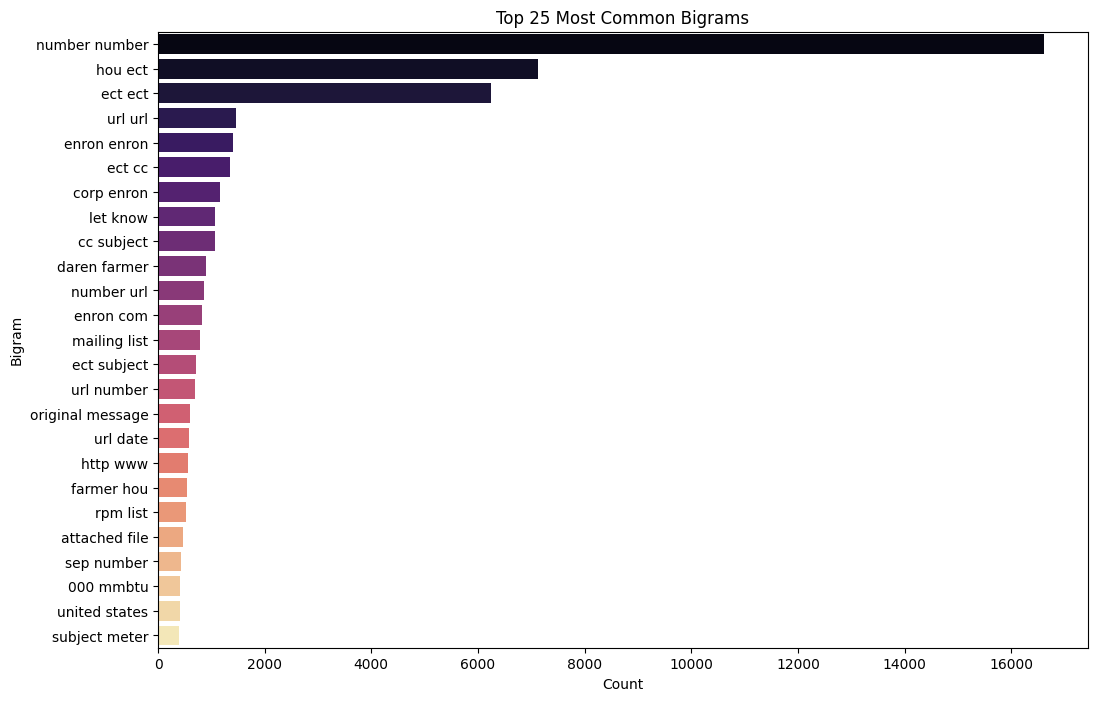

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['text'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


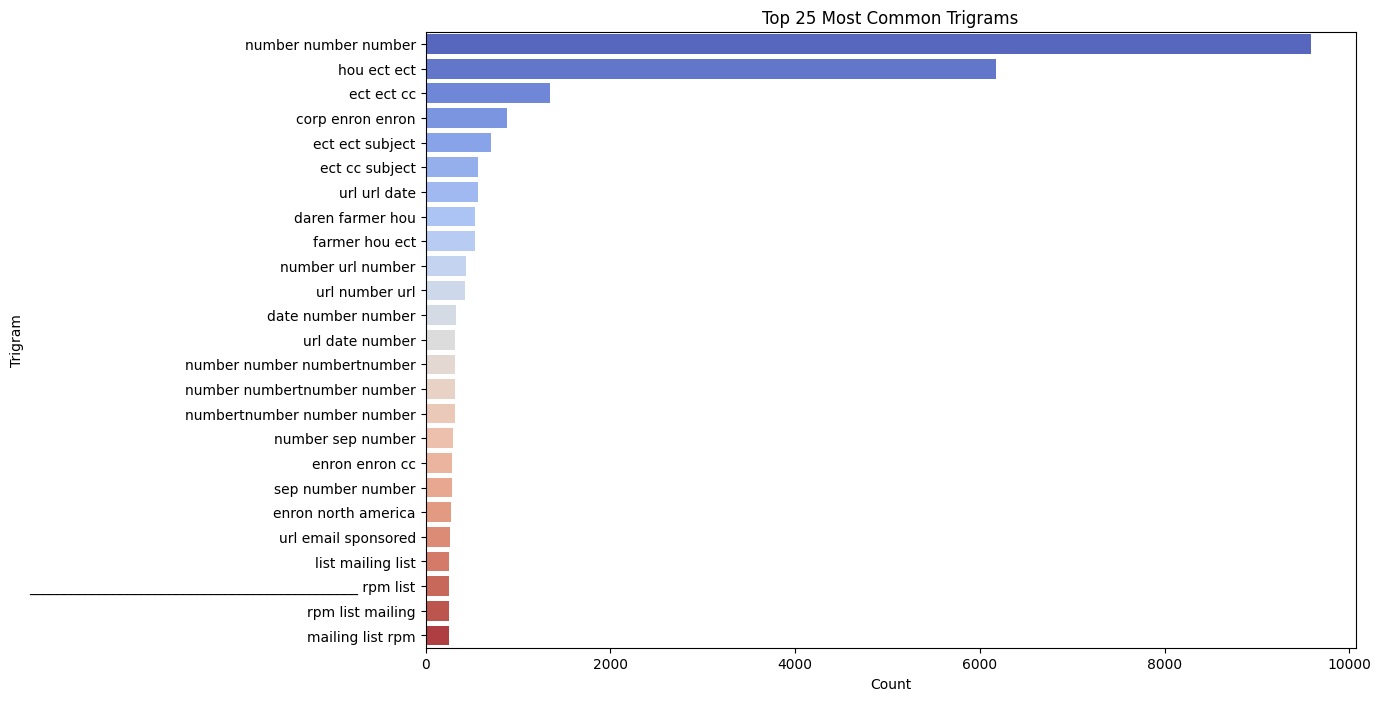

In [60]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['text'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [61]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [62]:
char_frequency_df

,character,frequency
2,,2166838
19,e,1003154
5,t,700297
13,a,632032
1,o,621017
...,...,...
540,聯,1
538,與,1
536,儘,1
529,加,1


In [63]:
all_text = ' '.join(df['text'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
2,,2166838
19,e,1003154
5,t,700297
13,a,632032
1,o,621017
4,n,590493
9,r,557244
6,i,545061
20,s,499182
7,l,356095


In [64]:
df.head()

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars
0,ham,"go until jurong point, crazy.. available only ...",20,4,111,9
1,ham,ok lar... joking wif u oni...,6,0,29,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,5,155,5
3,ham,u dun say so early hor... u c already then say...,11,2,49,6
4,ham,"nah i dont think he goes to usf, he lives arou...",13,6,61,2


In [65]:
top_25_df

,stop_word,count
0,the,70415
1,to,46634
2,and,35411
3,a,30061
4,of,27853
5,i,23276
6,in,21361
7,for,20345
8,you,17873
9,is,17730


In [66]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'text' column, retaining essential ones
df['text'] = df['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




there are some word that will completely change the meaning of a sentence

In [67]:
df.head()

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars
0,ham,"go jurong point, crazy.. available bugis n gre...",20,4,111,9
1,ham,ok lar... joking wif u oni...,6,0,29,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,5,155,5
3,ham,u dun say early hor... u c already say...,11,2,49,6
4,ham,"nah dont think goes usf, lives around though",13,6,61,2


In [68]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'text ' column that contains no stopwords
df['text'] = df['text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars
0,ham,"go jurong point, crazy.. available bugis n gre...",20,4,111,9
1,ham,ok lar... joking wif u oni...,6,0,29,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,5,155,5
3,ham,u dun say early hor... u c already say...,11,2,49,6
4,ham,"nah dont think go usf, life around though",13,6,61,2


Lemmatization is a process in natural language processing (NLP) used to reduce words to their base or root form, known as a lemma, while ensuring that the resulting word is an actual word in the language. Unlike stemming, which simply cuts off suffixes to achieve a root form, lemmatization considers the context of the word and its part of speech to return a valid base form.

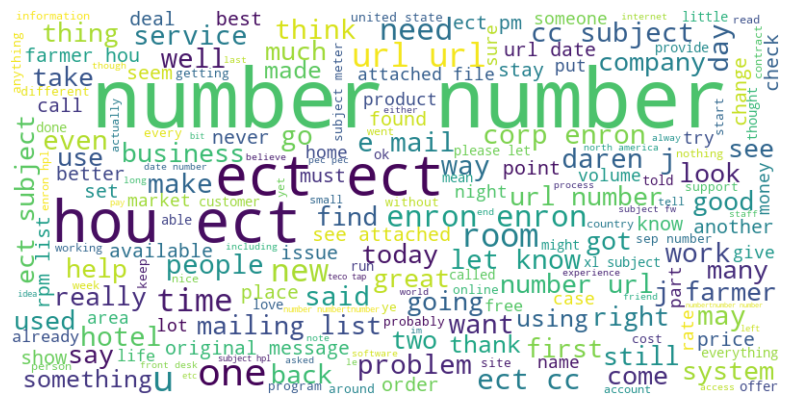

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['text'])

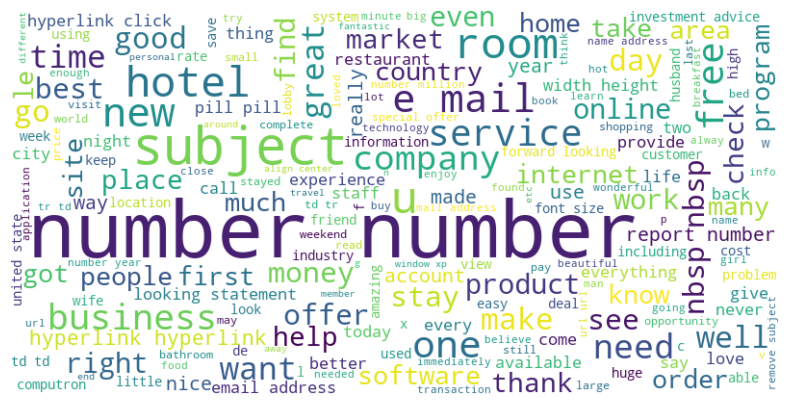

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['label'] == "spam"]['text'])

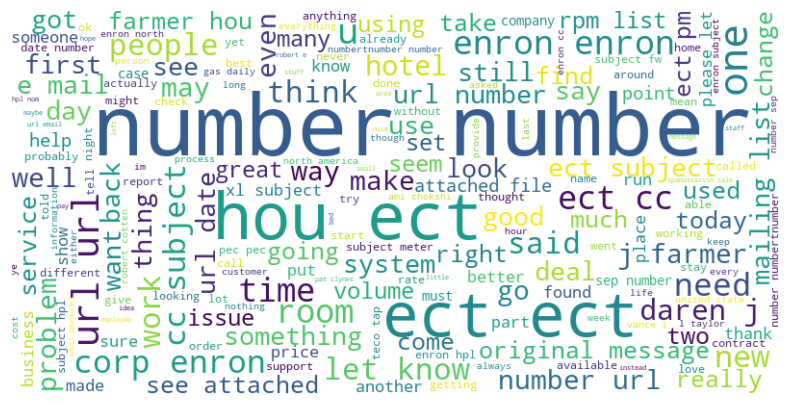

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['label'] == "ham"]['text'])

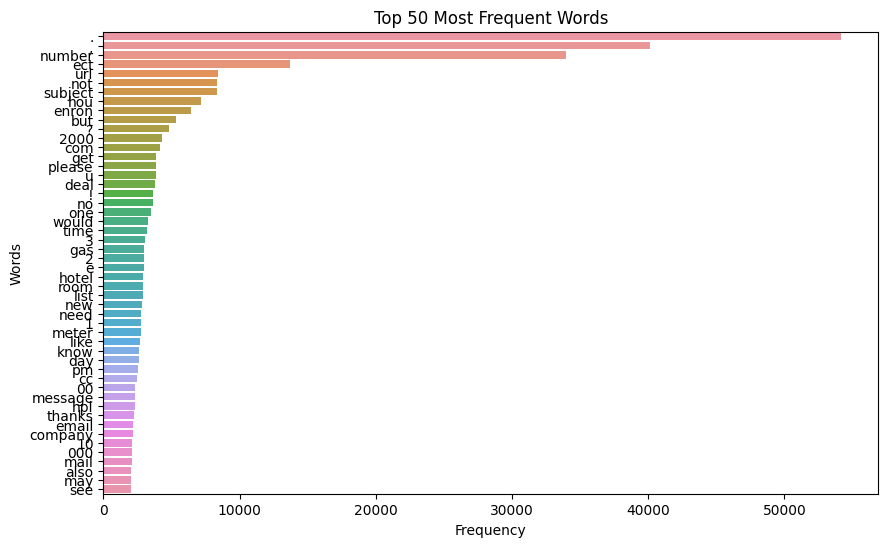

In [72]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['text']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


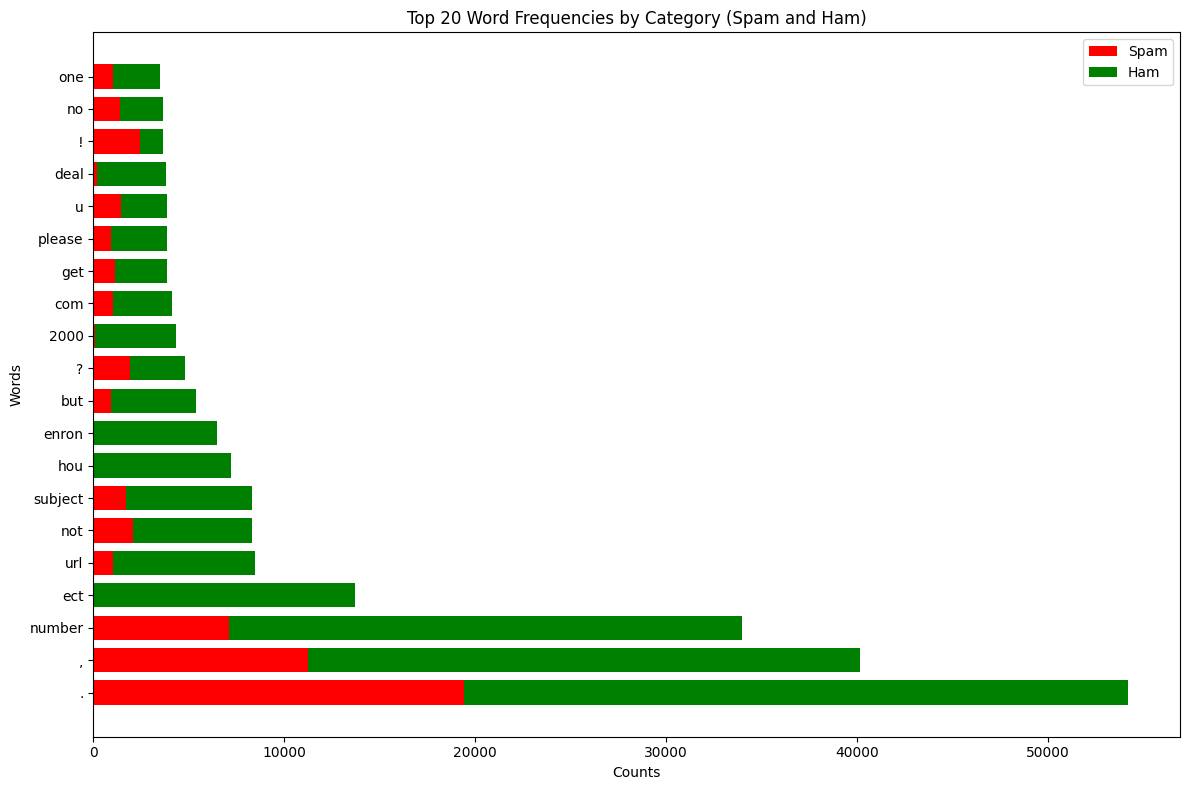

In [73]:
import matplotlib.pyplot as plt

def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on category (spam/ham)."""
    
    # Flatten all words in the text column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['text'].split()
        category = row['label']  # Assuming 'label' column exists with values 'spam' or 'ham'

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {"spam": 0, "ham": 0}  # Initialize counts for each category

            # Increment the count for the corresponding category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    spam_counts = [word_category_counts[word]["spam"] for word in top_words]
    ham_counts = [word_category_counts[word]["ham"] for word in top_words]
    
    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot spam counts in red
    plt.barh(word_labels, spam_counts, color='red', label='Spam', height=bar_width)

    # Plot ham counts in green, stacked on top of spam
    plt.barh(word_labels, ham_counts, left=spam_counts, color='green', label='Ham', height=bar_width)

    # Add labels and title
    plt.xlabel('Counts')
    plt.ylabel('Words')
    plt.title(f'Top {n} Word Frequencies by Category (Spam and Ham)')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Assuming 'df' is a DataFrame that has a 'text' column and a 'label' column with 'spam' or 'ham'
plot_top_n_words_by_category(df, n=20)


In [74]:
df

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars
0,ham,"go jurong point, crazy.. available bugis n gre...",20,4,111,9
1,ham,ok lar... joking wif u oni...,6,0,29,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,5,155,5
3,ham,u dun say early hor... u c already say...,11,2,49,6
4,ham,"nah dont think go usf, life around though",13,6,61,2
...,...,...,...,...,...,...
14614,ham,problem started booked intercontinental chicag...,131,59,745,24
14615,ham,amalfi hotel beautiful website interior decora...,121,62,670,18
14616,ham,intercontinental chicago magnificent mile outs...,141,72,770,9
14617,ham,"palmer house hilton, look good pictures, outsi...",86,47,448,16


In [75]:
def clean_text(text):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        return text

In [76]:
# Apply the clean_text function to the specified column
df['text'] = df['text'].apply(clean_text)

we have count the words, stop_words, chars , punctuation before text_preprocessing of the emails ,now we will count these all after preprocessing 

In [77]:
df['word_count_after_preprocessing']=df['text'].apply(lambda x:len(x.split()))

In [78]:
df.head()

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing
0,ham,go jurong point crazy available bugis n great ...,20,4,111,9,16
1,ham,ok lar joking wif u oni,6,0,29,6,6
2,spam,free entry wkly comp win fa cup final tkts st...,28,5,155,5,20
3,ham,u dun say early hor u c already say,11,2,49,6,9
4,ham,nah dont think go usf life around though,13,6,61,2,8


In [79]:
df['num_chars_after_preprocessing']=df['text'].apply(len)

In [80]:
df.head()

,label,text,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing
0,ham,go jurong point crazy available bugis n great ...,20,4,111,9,16,82
1,ham,ok lar joking wif u oni,6,0,29,6,6,23
2,spam,free entry wkly comp win fa cup final tkts st...,28,5,155,5,20,110
3,ham,u dun say early hor u c already say,11,2,49,6,9,35
4,ham,nah dont think go usf life around though,13,6,61,2,8,40


In [81]:
df.to_csv("cleaned_text.csv",index=False)